In [218]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [219]:
!wget 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [220]:
import zipfile
with zipfile.ZipFile('bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/mac/machine-learning-zoomcapm-homework/ml-zoomcamp/week-4/bank')


In [221]:
with zipfile.ZipFile('bank/bank.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/mac/machine-learning-zoomcapm-homework/ml-zoomcamp/week-4')


In [265]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [266]:
df.y= (df.y =='yes').astype(int)

In [224]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [267]:
df = df[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'
]]

In [268]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [269]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25001, random_state=1)

In [270]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [271]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [272]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

numerical = ['age','balance','day','duration','campaign','pdays','previous']

In [231]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [232]:
import builtins


features = ['balance','day','duration','previous']
scores = []

for i in features:
    result = roc_auc_score(y_train,df_train[i])
    if result <0.5:

        df_train[features]= -df_train[features]

        result = roc_auc_score(y_train,df_train[i])

    scores.append(result)


max_results = builtins.max(scores)
max_feature = features[scores.index(max_results)]

print(f'Feature: {max_feature}, Max score: {max_results}')

Feature: duration, Max score: 0.8146942424632446


### Question 1
Feature: duration, Max score: 0.8146942424632446

In [274]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [276]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [278]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8980426849496849

In [236]:
auc_value = round(roc_auc_score(y_val,y_pred),4)

auc_value

0.9003

In [237]:
df_full_train.shape

(36168, 15)

### Question 2
0.89

In [238]:
len(y_train),len(y_pred),len(y_val)

(27125, 9043, 9043)

### Presision and Recall

In [279]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
scores

[(0.0, 1098, 7945, 0, 0),
 (0.01, 1094, 7004, 4, 941),
 (0.02, 1093, 5800, 5, 2145),
 (0.03, 1087, 4759, 11, 3186),
 (0.04, 1070, 3826, 28, 4119),
 (0.05, 1048, 3100, 50, 4845),
 (0.06, 1023, 2536, 75, 5409),
 (0.07, 994, 2166, 104, 5779),
 (0.08, 972, 1874, 126, 6071),
 (0.09, 947, 1645, 151, 6300),
 (0.1, 929, 1497, 169, 6448),
 (0.11, 896, 1366, 202, 6579),
 (0.12, 859, 1221, 239, 6724),
 (0.13, 837, 1119, 261, 6826),
 (0.14, 818, 1047, 280, 6898),
 (0.15, 800, 972, 298, 6973),
 (0.16, 777, 907, 321, 7038),
 (0.17, 761, 850, 337, 7095),
 (0.18, 742, 783, 356, 7162),
 (0.19, 730, 737, 368, 7208),
 (0.2, 710, 695, 388, 7250),
 (0.21, 699, 656, 399, 7289),
 (0.22, 688, 617, 410, 7328),
 (0.23, 667, 578, 431, 7367),
 (0.24, 648, 547, 450, 7398),
 (0.25, 633, 520, 465, 7425),
 (0.26, 619, 496, 479, 7449),
 (0.27, 606, 473, 492, 7472),
 (0.28, 596, 454, 502, 7491),
 (0.29, 580, 437, 518, 7508),
 (0.3, 566, 411, 532, 7534),
 (0.31, 556, 396, 542, 7549),
 (0.32, 544, 383, 554, 7562),
 (0.33

In [240]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [241]:
import random

In [242]:
n = 100000
success = 0

for i in range(n):

    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success/n

0.89852

In [243]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.89868

In [280]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [281]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,1098,7945,0,0,0.121420,1.000000
1,0.01,1094,7004,4,941,0.135095,0.996357
2,0.02,1093,5800,5,2145,0.158567,0.995446
3,0.03,1087,4759,11,3186,0.185939,0.989982
4,0.04,1070,3826,28,4119,0.218546,0.974499
...,...,...,...,...,...,...,...
96,0.96,30,17,1068,7928,0.638298,0.027322
97,0.97,25,15,1073,7930,0.625000,0.022769
98,0.98,20,10,1078,7935,0.666667,0.018215
99,0.99,11,5,1087,7940,0.687500,0.010018


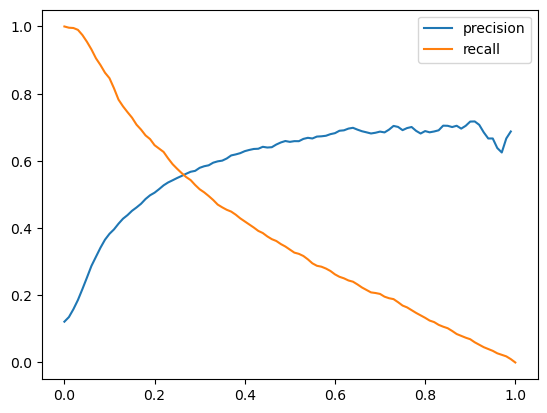

In [246]:
plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()

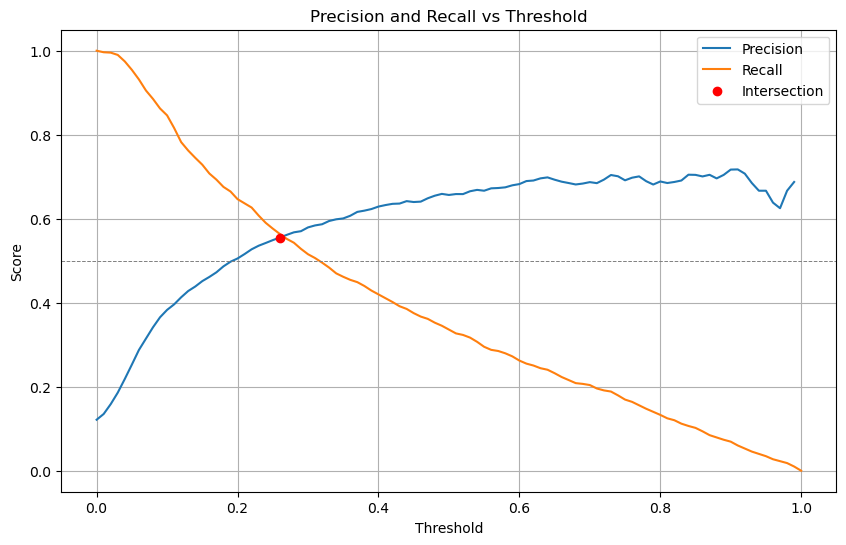

Intersection found at threshold: 0.26, Value: 0.5551569506726457


In [247]:

# Find intersection of precision and recall
thresholds = df_scores['threshold']
precision = df_scores['precision']
recall = df_scores['recall']

# Finding intersection point
intersection_idx = np.argwhere(np.isclose(precision, recall, atol=1e-2)).flatten()

if len(intersection_idx) > 0:
    intersection_threshold = thresholds[intersection_idx[0]]
    intersection_value = precision[intersection_idx[0]]
else:
    intersection_threshold = None
    intersection_value = None

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')

# Highlight the intersection point
if intersection_threshold is not None:
    plt.scatter(intersection_threshold, intersection_value, color='red', zorder=5, label='Intersection')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)  # Optional: add a horizontal line for reference
plt.legend()
plt.grid()
plt.show()

if intersection_threshold is not None:
    print(f'Intersection found at threshold: {intersection_threshold}, Value: {intersection_value}')
else:
    print('No intersection found within the specified tolerance.')


### Question 3
0.265

In [248]:
df_scores['f1'] = 2 * (df_scores.precision * df_scores.recall)/(df_scores.precision + df_scores.recall)

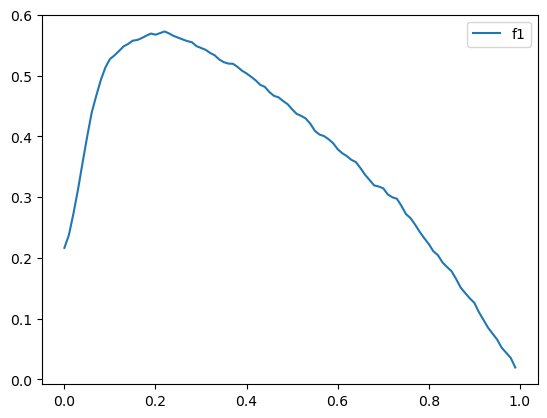

In [249]:
plt.plot(df_scores.threshold, df_scores['f1'], label='f1')
plt.legend()

### Question 4
0.22

In [250]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [251]:
#dv, model = train(df_train,y_train)

In [252]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [253]:
#y_pred = predict(df_val, dv, model)

In [254]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [255]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [256]:
#train_idx, val_idx = next(kfold.split(df_full_train))
#len(train_idx), len(val_idx)

In [257]:
#df_train = df_train_val.iloc[train_idx]
#df_val = df_full_train.iloc[val_idx]

In [258]:
#y_train = df_train.y.values
#y_val = df_val.y.values

In [259]:
#dv, model = train(df_train,y_train)

In [260]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_train_val.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)

    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0it [00:00, ?it/s]

0.906 +- 0.005


In [261]:
round(np.mean(scores),4), round(np.std(scores),6)

(0.906, 0.005497)

### Question 5
0.006

In [264]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv = DictVectorizer(sparse=False)

        train_dict = df_train[categorical + numerical].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        val_dict = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        test_dict = df_test[categorical + numerical].to_dict(orient='records')
        X_test = dv.transform(test_dict)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.005


### Question 6
C=1.0 has the highest mean score of 0.906 in my case